<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit5/YangChauUnit5Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.1
    Uninstalling nbclient-0.10.1:
      Successfully uninstalled nbclient-0.10.1


#Total Renewable Energy Production vs Total Primary Energy Production

##Introduction

This project aims to predict the amount of total energy production based on the amount of Renewable energy production.
 - energy imports or exports will not be considered for this project

##Methods

 I will be isolating data concerning total energy produced and total renewable energy produced
  - I am assuming other data points do not have an influence on the relationship between TRE (Total Renewable Energy) and TE (Total Energy)


In [3]:
import preliz as pz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import arviz as az
import seaborn as sns
import pymc as pm
from scipy.interpolate import PchipInterpolator


#Data

Represents statistics regarding U.S. energy production, export, and import
 - Contains all datapoints from January 1973 to August of 2024
 - Sourced from Data.gov

In [4]:
url = "https://raw.githubusercontent.com/aahFancyGun/dataScienceClass/master/unit5/Table_1.csv"

energy_data = pd.read_csv(url) #reading data

energy_data


,Month,Total Fossil Fuels Production,Nuclear Electric Power Production,Total Renewable Energy Production,Total Primary Energy Production,Primary Energy Imports,Primary Energy Exports,Primary Energy Net Imports,Primary Energy Stock Change and Other,Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Total Renewable Energy Consumption,Total Primary Energy Consumption
0,1973 January,4.932632,0.068103,0.219839,5.220574,1.173080,0.125781,1.047299,0.771858,6.747651,0.068103,0.219839,7.039731
1,1973 February,4.729582,0.064634,0.197330,4.991545,1.168005,0.120883,1.047122,0.390129,6.163095,0.064634,0.197330,6.428796
2,1973 March,4.946902,0.072494,0.218686,5.238082,1.309473,0.139950,1.169523,-0.067640,6.044647,0.072494,0.218686,6.339964
3,1973 April,4.716271,0.064070,0.209330,4.989672,1.085169,0.194185,0.890984,-0.110067,5.493184,0.064070,0.209330,5.770589
4,1973 May,4.956995,0.062111,0.215982,5.235087,1.162804,0.196775,0.966029,-0.305335,5.613551,0.062111,0.215982,5.895781
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,2024 April,6.898456,0.602260,0.750907,8.251623,1.772336,2.388830,-0.616495,-0.489974,5.807945,0.602260,0.736529,7.145154
616,2024 May,7.171201,0.679097,0.762088,8.612387,1.935037,2.539163,-0.604126,-0.525674,6.045015,0.679097,0.758321,7.482587
617,2024 June,7.083462,0.712744,0.757944,8.554150,1.815086,2.602686,-0.787600,-0.183319,6.123286,0.712744,0.742351,7.583232
618,2024 July,7.286615,0.730441,0.746007,8.763063,1.967205,2.527858,-0.560653,-0.010900,6.716494,0.730441,0.733689,8.191510


##Scatterplot

###Real World Observations

The scatterplot approximately models the  relationship I expected, with energy production following a exponential trend with respect to total renewable energy. However, one thing that does surprise me is the fact that while TRB increases linearly, TE does not. With all the environmental activism I would have presumed that this model should have followed something closer to a logarithmic curve, wherein as TRB goes up, it continues to take up more and more of TE.

###Technical Observations

Just based off a surface level viewing of the scatterplot contained below, it's apparent that the model follows a slight exponential curve, meaning that a linear regression model may not be the best fit, but we'll come back to that later

<Axes: xlabel='Total Renewable Energy Production', ylabel='Total Primary Energy Production'>

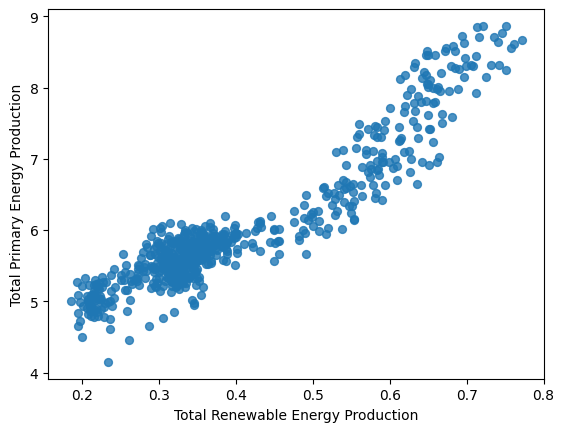

In [5]:

from matplotlib import pyplot as plt
energy_data.plot(kind='scatter', x='Total Renewable Energy Production', y='Total Primary Energy Production', s=32, alpha=.8)


#Linear Regression Model

The Linear Regression Model served as my first choice of model and is about as simple as regression models get. It's not the best fit for this data for reasons that will be explained near the end of this section.

##Prior "alpha"

The alpha prior essentially represents the intercept of the model, or wherever it will cross the y-axis.
 - I used a normal distribution for this prior because while I'm somewhat interested in the continuity of human energy usage has evolved over time, I don't have a lot of concrete knowledge on the situation.
 - mu of 0 and sigma of 100 essentially is me expressing uncertainty.
  - Mu (mean) of 0 because I'm not sure where the model should be centered
  - Sigma (standard deviation) of 100 because with a large standard deviation, I can be sure that the actual y-intercept will probably fall within that range.

##Prior "beta"

The beta prior represents the slope coefficient of my model it would be like the m in y = mx + b
 - Although I'm not certain about what the slope should be, I do know that its completely unfeasible for the slope to be 100 or 56 or something really high because energy production hasn't grown that much in the last 50/60 years. That's why my mu and sigma for this prior are a bit more precise
  - Mu of 0
  - Sigma of 10

##Deterministic Prior

This prior is basically how you make the linear regression model linear so to speak. It basically represents the equation of the linear model you are trying to create.
- Notice that the arguments are in the form a + b(data), which is similar to    y = mx + b? Well, its for that reason that this model is linear!

##Prior "Sigma"

Simple representation of uncertainty of datapoints around the mean determined by the deterministic prior



In [6]:
#le stands for linear energy
with pm.Model() as model_le:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)

    #linear part of  model
    μ = pm.Deterministic("μ", α + β * energy_data["Total Renewable Energy Production"])

    #prior for the standard deviation of  likelihood
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=energy_data["Total Primary Energy Production"])

    #inference data object
    idata_le = pm.sample()

Output()

Output()

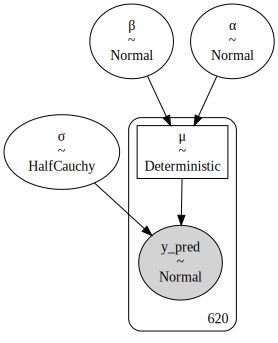

In [7]:
#visualization of the linear model structure
pm.model_to_graphviz(model_le)

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

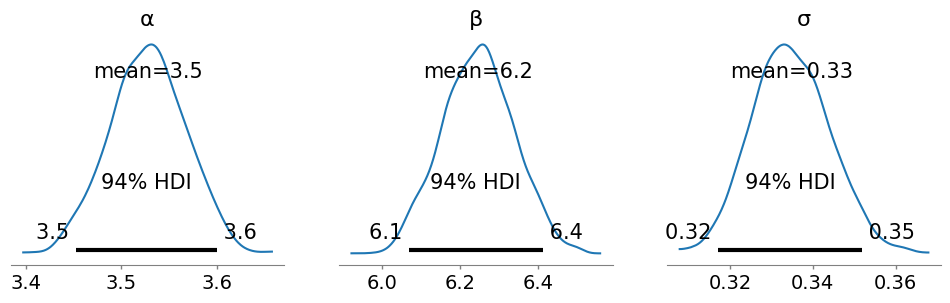

In [8]:
#plot of the posteriors for all the components of my line
#'~μ' means plot all variables except μ
az.plot_posterior(idata_le, var_names=["~μ"], figsize=(12, 3))

##Graphing Model

Text(0, 0.5, 'Total Primary Energy Production')

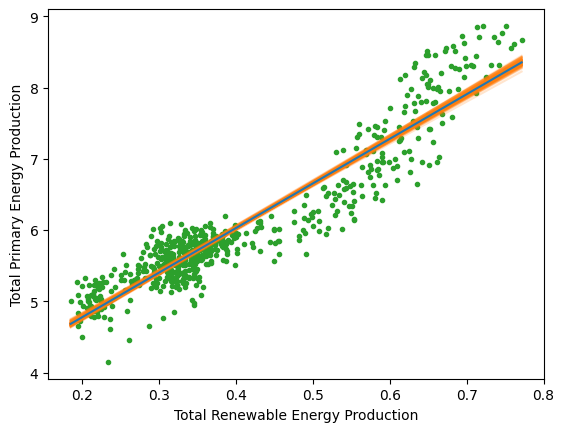

In [9]:
#grabs 100 posterior samples
posterior = az.extract(idata_le, num_samples=100)

# grabbing x values for graphing.
x_plot = xr.DataArray(
    np.linspace(energy_data["Total Renewable Energy Production"].min(), energy_data["Total Renewable Energy Production"].max(), 50),
    dims="plot_id"
    )

# this creates the expected line, the path we predict temperature and
#rented bike count deviates from
mean_line = posterior["α"].mean() + posterior["β"].mean() * x_plot

#These are a 50 lines that our model came up with
lines = posterior["α"] + posterior["β"] * x_plot

#set up plot
_, ax = plt.subplots()

#plots 50 other lines our model came up with.
ax.plot(x_plot, lines.T, c="C1", alpha=0.2, label="lines")

#plots the mean line
ax.plot(x_plot, mean_line, c="C0", label="mean line")

#plot the raw data
ax.plot(energy_data["Total Renewable Energy Production"], energy_data["Total Primary Energy Production"], "C2.", zorder=-3)

#label axes and create legend
ax.set_xlabel("Total Renewable Energy Production")
ax.set_ylabel("Total Primary Energy Production")

##Predictive Posterior Check

Output()

<Axes: xlabel='y_pred'>

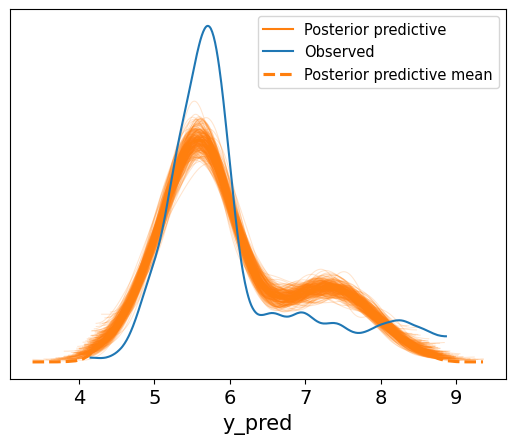

In [10]:
pm.sample_posterior_predictive(idata_le, model=model_le,  extend_inferencedata=True)

az.plot_ppc(idata_le, num_pp_samples=250, colors=["C1", "C0", "C1"])


##Graphing Model with HDIs

Text(0, 0.5, 'weight')

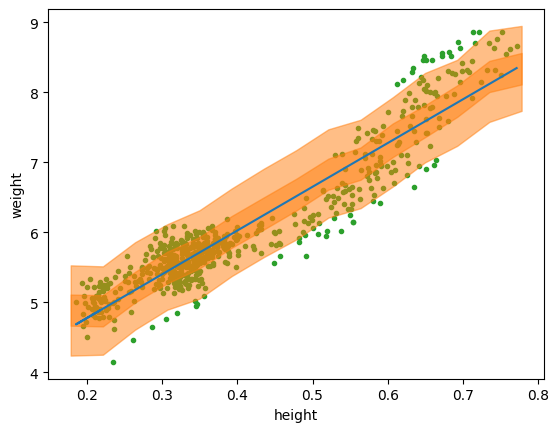

In [11]:
#grabs the expected line, or line of best fit formula
mean_line = idata_le.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
height = np.random.normal(energy_data["Total Renewable Energy Production"].values, 0.01)
idx = np.argsort(height)
x = np.linspace(height.min(), height.max(), 15)

#grabs the 94% HDI and 50% HDI, and sets them up for graphing.
y_pred_q = idata_le.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(height[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(energy_data["Total Renewable Energy Production"], energy_data["Total Primary Energy Production"], "C2.", zorder=-3)
ax.plot(energy_data["Total Renewable Energy Production"][idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("height")
ax.set_ylabel("weight")

##Analysis of Linear Regression Model

To its credit, this model fits pretty well with my observed data, which it can only accomplish because the observed data is only slightly exponential in nature. That said, it's still not super useful in my opinion. Looking at the predictive posterior check, you can see that it diverges from the observed data significantly on multiple occasions, so while it gets the general idea of where this relationship is headed, it's not precise.

But that makes a lot of sense. The growth in energy production in the last 50 years has been anything but linear, with human energy demands only increasing exponentially, theres simply no way that the data could represent something linear. That's why, in order to more effectively model reality, I've chosen to make an additional model, that incorporates the exponential curve.

#Polynomial Regression Model

The polynomial regression model is largely the same as the linear regression model, even going down to the values used in my priors theyre essentially the same between the two. So how do they differ? Well, the polynomial regression model has the addition of a second slope coefficient, to model a quadratic equation.

##Prior Beta 2

This is really the only difference btween the two models. It's essentially a copy pasted beta prior which was discussed. The way in which it differs though, is how I use it in the deterministic prior of this model.

##Deterministic Prior

Like earlier, you'll notice that it's in the format of a + b1(data) + b2(data)^2, which, is just a reversed version of ax^2 + bx + c. So by simply adding another coefficient and multiplying it by my x (data) squared, I am able to account for my data being exponential by making my model exponential!

In [9]:
with pm.Model() as model_poly2:

    α = pm.Normal("α", mu=0, sigma=100)
    β1 = pm.Normal("β1", mu=0, sigma=10)
    β2 = pm.Normal("β2", mu=0, sigma=10)

    x = energy_data["Total Renewable Energy Production"]

    μ = pm.Deterministic("μ", α + β1 * x + β2 * x**2)

    σ = pm.HalfCauchy("σ", 10)

    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=energy_data["Total Primary Energy Production"])

    idata_poly2 = pm.sample()


Output()

Output()

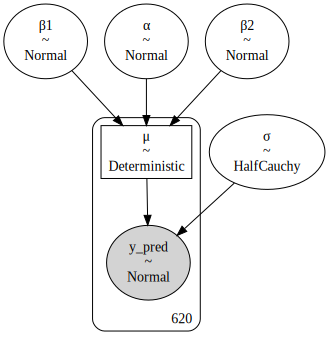

In [10]:
#visualization of the linear model structure
pm.model_to_graphviz(model_poly2)

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β1'}>,
       <Axes: title={'center': 'β2'}>, <Axes: title={'center': 'σ'}>],
      dtype=object)

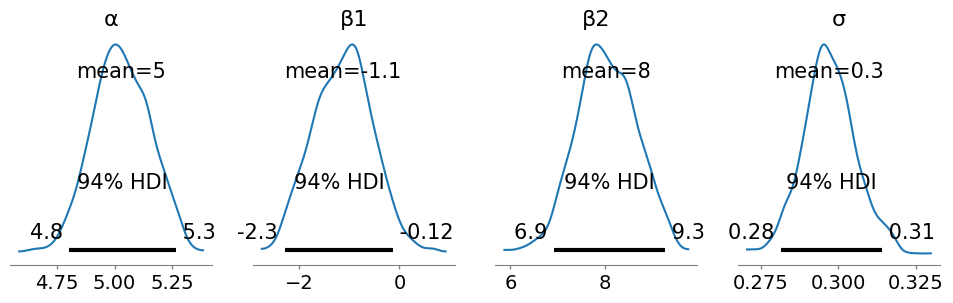

In [11]:
#plot of the posteriors for all the components of my line
#'~μ' means plot all variables except μ
az.plot_posterior(idata_poly2, var_names=["~μ"], figsize=(12, 3))

##Graphing Model

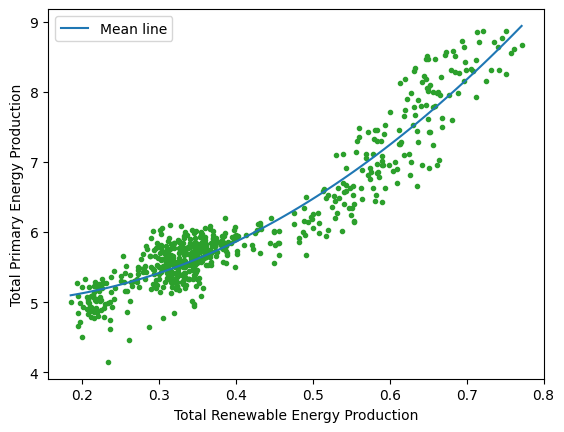

In [20]:
posterior_poly = az.extract(idata_poly2, num_samples=100)

x_plot = np.linspace(x.min(), x.max(), 100)

mean_line = posterior_poly["α"].values.mean() + posterior_poly["β1"].values.mean() * x_plot + posterior_poly["β2"].values.mean() * x_plot**2
lines = (posterior_poly["α"].values[:, None] + posterior_poly["β1"].values[:, None] * x_plot
         + posterior_poly["β2"].values[:, None] * x_plot**2)

_, ax = plt.subplots()
ax.plot(x_plot, mean_line, color="C0", label="Mean line")
ax.plot(x, energy_data["Total Primary Energy Production"], "C2.", zorder=-3)
ax.set_xlabel("Total Renewable Energy Production")
ax.set_ylabel("Total Primary Energy Production")
ax.legend()
plt.show()

##Posterior Predictive Check

Output()

<Axes: xlabel='y_pred'>

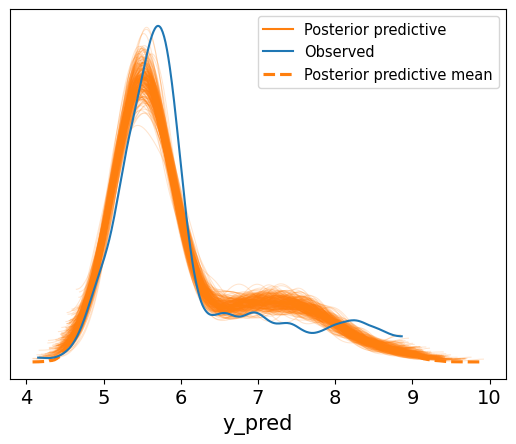

In [24]:
pm.sample_posterior_predictive(idata_poly2, model=model_poly2,  extend_inferencedata=True)

az.plot_ppc(idata_poly2, num_pp_samples=250, colors=["C1", "C0", "C1"])


##Graphing Model With HDIs

Text(0, 0.5, 'weight')

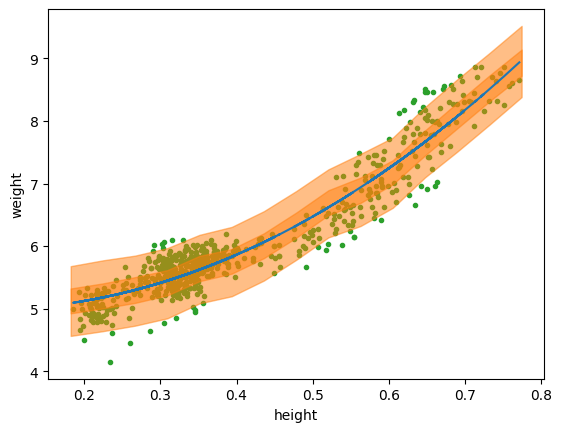

In [25]:
#grabs the expected line, or line of best fit formula
mean_line = idata_poly2.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
height = np.random.normal(energy_data["Total Renewable Energy Production"].values, 0.01)
idx = np.argsort(height)
x = np.linspace(height.min(), height.max(), 15)

#grabs the 94% HDI and 50% HDI, and sets them up for graphing.
y_pred_q = idata_poly2.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
y_hat_bounds = iter(
    [
        PchipInterpolator(height[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(energy_data["Total Renewable Energy Production"], energy_data["Total Primary Energy Production"], "C2.", zorder=-3)
ax.plot(energy_data["Total Renewable Energy Production"][idx], mean_line[idx], c="C0")


for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("height")
ax.set_ylabel("weight")

###Closing Comparisons and Analysis

####Comparisons

The difference is massive in my opinion. Like earlier, if we look at the posterior predictive check, you can see that this model is much much closer to following the line charted by my observed data. It's still not perfect, but its much more precise, and it's something that I think could have real world uses.

####Analysis

Going back to a point I mentioned earlier, it's really interesting to me to see that as Total Renewable Energy production increases along the x-axis, the Total energy produced increases exponentially. There's always a lot of talk about climate activism and fighting global warming etc., which led me into this project believing that I would be dealing with something closer to a logarithmic curve, wherein, as Total Renewable Energy increases along the x-axis, the total energy produced would increase by smaller and smaller increments.

####But why is this the case?

I don't really have the know how to explain that, but if I had to guess, I would assume the blame can be put on rampant lobbying by pro-fossil fuel political engines as well as the public perception of nuclear power (insanely clean with little). I believe that the combination of the two has simply pushed people and politicians to continue investing in environmentally harmful energy sources under the perception that the alternatives (nuclear) are worse and renewables aren't reliable enough.

